# Boosting

Boosting is an ensemble method that combine multiple weak learner alghoritm into one strong learner. Bagging also implement the same thing but Boosting learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy.

Very roughly, we can say that bagging will mainly focus at getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).

There are 3 popular Boosting technique out there:
1. AdaBoost (Adaptive Boosting)
1. Gradient Boosting
1. XGBoost (Extreme Gradient Boosting)

Let's try to explore these methods now

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
dfdiabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dfdiabetes.head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
num_pregnant      768 non-null int64
plasma_conc       768 non-null int64
blood_pressure    768 non-null int64
tricep_thick      768 non-null int64
serum_insulin     768 non-null int64
BMI               768 non-null float64
d_pedigree        768 non-null float64
age               768 non-null int64
diabetes          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data = dfdiabetes.drop('diabetes', axis = 1)
target = dfdiabetes['diabetes']

In [6]:
target.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

## AdaBoost

Cited from sklearn:

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. In AdaBoost, we would have two kind of weight; the observation weight and the classifier weight.

Using AdaBoost classifier, our target class would be always $y = \left\{1, -1\right\}$ where positive 1 is represent the positive class and negative 1 (-1) is represent the negative class. 

In AdaBoost, we could let the classifier equation as below:

$$ Gm(x) m=1,2,...,M$$ 

Where $Gm(x)$ is our boosted classifier and M is the sequence of our weak classifiers, and our objective is:

$$G(x)=sign(α_1G_1(x)+α_2G_2(x)+...α_MG_M(x))=sign(\sum_{m=1}^{M}α_mG_m(x))$$

where $α$ is the classifier weight, and sign is represent the positive or negative (depend on what class is predicted)

In the first step, Initialize the obervation weights $w_i=1/N$ for every observation on the data. 

for $m=1,2,...,M$

- Compute the weighted error $Err_m=\large\frac{\sum_{i=1}^{N}w_iI(y(i)≠Gm(x(i)))}{\sum_{i=1}^{N}w_i}$ , where we sum the weight of the misclassified data divided by the sum of all the data weight 
- Compute the estimator coefficient $α_m=L*log(\frac{1−err_m}{err_m})$ where $L≤1$ is the learning rate
- Set data weights $w_i←w_i*exp[α_mI(y(i)≠Gm(x(i)))]$ which mean if it is misclassified, the observed data would be updated as $\large w_i * e^{α_m}$ else it updated as $\large w_i * e^{-α_m}$
- Normalized the weight data in each step by $w_i←\frac{w_i}{\sum_{i=1}^{N}w_i}$

The expected output would be the sum of the classifier weight multiply by the predicted target class. For example if we have 3 classifier which predict 1, 1, -1. The sum would be 1, which mean the prediction would be the positive class, but if we the weight of the classifier is 0.3, 0.1, 1 then the sum would be 0.3 * 1 + 0.1 * 1 + 1 * -1 which equal to -0.6, then our prediction would come to the negative class 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
dt = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 5, max_depth = 1 )

In [9]:
ada = AdaBoostClassifier(base_estimator =dt,n_estimators = 1000, learning_rate = 0.05, algorithm = 'SAMME')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 101)

In [11]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [13]:
ada.feature_importances_ 

array([0.05552874, 0.3899502 , 0.        , 0.        , 0.        ,
       0.38354926, 0.071597  , 0.09937479])

In [14]:
ada.estimator_weights_

array([0.05385066, 0.05115813, 0.04537125, 0.04765938, 0.04527641,
       0.04087251, 0.04200059, 0.0378057 , 0.02263004, 0.02149854,
       0.02116606, 0.02091103, 0.01986548, 0.01943241, 0.02080425,
       0.019858  , 0.0188651 , 0.01920274, 0.01842235, 0.01750123,
       0.01662617, 0.01579486, 0.01500512, 0.01545161, 0.02015132,
       0.01529699, 0.01481318, 0.02824223, 0.0210615 , 0.02084163,
       0.01631298, 0.01549733, 0.01472246, 0.0141617 , 0.01446363,
       0.01394134, 0.01885234, 0.03259195, 0.0136671 , 0.01405377,
       0.02682073, 0.01375752, 0.01352565, 0.01823318, 0.01401838,
       0.01331746, 0.01343285, 0.01958399, 0.01946928, 0.03087124,
       0.01305251, 0.01279549, 0.02528953, 0.0131269 , 0.01247055,
       0.01275917, 0.01228879, 0.0125476 , 0.01738107, 0.01257972,
       0.01201637, 0.01797819, 0.01637006, 0.02916467, 0.02384844,
       0.01259012, 0.01196062, 0.01163471, 0.01177068, 0.0114661 ,
       0.01619445, 0.01202713, 0.01142578, 0.01139536, 0.01125

In [15]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.66      0.57      0.61        51

    accuracy                           0.76       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [16]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       103
           1       0.73      0.47      0.57        51

    accuracy                           0.77       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.76      0.77      0.75       154



In [17]:
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator =dt)

In [18]:
param_grid = {
                "base_estimator__min_samples_split" : [i for i in range(2,4)],
              "base_estimator__min_samples_leaf" :   [i for i in range(2,4)],
              "n_estimators": [10, 20, 50],
              "learning_rate": np.linspace(0.01, 0.1, 5)
             }

search = GridSearchCV(estimator = ada, param_grid = param_grid, scoring = 'roc_auc', cv = 3)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                

In [19]:
search.best_params_

{'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'learning_rate': 0.0775,
 'n_estimators': 50}

## Gradient Boosting

Gradient Boosting work like AdaBoost but include few differences. 

Gradient boosting involves three elements:

1. A loss function to be optimized.
1. A weak learner to make predictions.
1. An additive model to add weak learners to minimize the loss function.

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gradient = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100)

In [22]:
gradient.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
gradient.oob_improvement_

array([5.89090022e-03, 5.03701686e-03, 4.43930484e-03, 4.79940263e-03,
       5.14353264e-03, 4.83714834e-03, 4.93981046e-03, 4.42067916e-03,
       3.94213127e-03, 4.73360346e-03, 4.53878080e-03, 3.80777690e-03,
       4.77743258e-03, 4.11285384e-03, 4.24316272e-03, 3.70525890e-03,
       2.64016773e-03, 4.44309544e-03, 4.26229224e-03, 3.61845728e-03,
       2.79892690e-03, 4.11802805e-03, 3.49541144e-03, 3.64920986e-03,
       3.24016136e-03, 3.19114244e-03, 2.17981734e-03, 3.31522972e-03,
       3.29261690e-03, 3.07892263e-03, 2.13028461e-03, 3.28610909e-03,
       2.90070740e-03, 1.91329358e-03, 2.74031415e-03, 3.19812059e-03,
       2.21607242e-03, 2.15358176e-03, 2.85828829e-03, 2.82341827e-03,
       2.15361098e-03, 2.95107629e-03, 1.56368092e-03, 1.97867215e-03,
       2.65886098e-03, 2.09730632e-03, 2.39994475e-03, 2.59516895e-03,
       1.78950514e-03, 2.08299842e-03, 1.96318096e-03, 2.25903251e-03,
       2.27767262e-03, 1.77906130e-03, 2.07599366e-03, 1.75983242e-03,
      

In [24]:
print(classification_report(y_train, gradient.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       397
           1       0.86      0.50      0.63       217

    accuracy                           0.79       614
   macro avg       0.82      0.73      0.74       614
weighted avg       0.81      0.79      0.78       614



In [25]:
print(classification_report(y_test, gradient.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       103
           1       0.74      0.49      0.59        51

    accuracy                           0.77       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.77      0.77      0.76       154



## XGBoost

In [26]:
from xgboost import XGBClassifier

In [27]:
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1)

In [28]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
print(classification_report(y_train, xgboost.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       397
           1       0.94      0.89      0.91       217

    accuracy                           0.94       614
   macro avg       0.94      0.93      0.93       614
weighted avg       0.94      0.94      0.94       614



In [30]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       103
           1       0.63      0.63      0.63        51

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [32]:
dfdiabetes.head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Aggregation

In [35]:
dfdiabetes.head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
agg = dfdiabetes.drop('diabetes', axis = 1).groupby('num_pregnant').agg(['mean', 'std'])

In [46]:
agg_plasma = pd.merge(dfdiabetes, agg['plasma_conc'].reset_index(), on = 'num_pregnant')

In [98]:
agg_plasma.head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes,mean,std
0,6,148,72,35,0,33.6,0.627,50,1,120.8,34.751009
1,6,92,92,0,0,19.9,0.188,28,0,120.8,34.751009
2,6,144,72,27,228,33.9,0.255,40,0,120.8,34.751009
3,6,93,50,30,64,28.7,0.356,23,0,120.8,34.751009
4,6,111,64,39,0,34.2,0.260,24,0,120.8,34.751009


In [55]:
def create_agg(df):
    group_agg = df.drop( 'diabetes', axis = 1).groupby('num_pregnant').agg(['mean', 'sum', 'std', 'min', 'max', 'count'])
    for col in df.drop(['diabetes', 'num_pregnant'], axis =1).columns:
        category_agg = group_agg[col]
        category_agg.columns = ['{}_{}_{}'.format(i,'num_pregnant',col) for i in ['mean', 'sum', 'std', 'min', 'max', 'count']]
        df = pd.merge(df, category_agg.reset_index(), on ='num_pregnant')
    return df     

In [57]:
create_agg(dfdiabetes).head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes,mean_num_pregnant_plasma_conc,sum_num_pregnant_plasma_conc,std_num_pregnant_plasma_conc,min_num_pregnant_plasma_conc,max_num_pregnant_plasma_conc,count_num_pregnant_plasma_conc,mean_num_pregnant_blood_pressure,sum_num_pregnant_blood_pressure,std_num_pregnant_blood_pressure,min_num_pregnant_blood_pressure,max_num_pregnant_blood_pressure,count_num_pregnant_blood_pressure,mean_num_pregnant_tricep_thick,sum_num_pregnant_tricep_thick,std_num_pregnant_tricep_thick,min_num_pregnant_tricep_thick,max_num_pregnant_tricep_thick,count_num_pregnant_tricep_thick,mean_num_pregnant_serum_insulin,sum_num_pregnant_serum_insulin,std_num_pregnant_serum_insulin,min_num_pregnant_serum_insulin,max_num_pregnant_serum_insulin,count_num_pregnant_serum_insulin,mean_num_pregnant_BMI,sum_num_pregnant_BMI,std_num_pregnant_BMI,min_num_pregnant_BMI,max_num_pregnant_BMI,count_num_pregnant_BMI,mean_num_pregnant_d_pedigree,sum_num_pregnant_d_pedigree,std_num_pregnant_d_pedigree,min_num_pregnant_d_pedigree,max_num_pregnant_d_pedigree,count_num_pregnant_d_pedigree,mean_num_pregnant_age,sum_num_pregnant_age,std_num_pregnant_age,min_num_pregnant_age,max_num_pregnant_age,count_num_pregnant_age
0,6,148,72,35,0,33.6,0.627,50,1,120.8,6040,34.751009,0,195,50,68.42,3421,20.956797,0,96,50,17.64,882,16.384114,0,45,50,63.58,3179,95.686156,0,370,50,30.29,1514.5,7.327562,0.0,46.2,50,0.42952,21.476,0.301164,0.084,1.461,50,39.34,1967,11.966978,23,66,50
1,6,92,92,0,0,19.9,0.188,28,0,120.8,6040,34.751009,0,195,50,68.42,3421,20.956797,0,96,50,17.64,882,16.384114,0,45,50,63.58,3179,95.686156,0,370,50,30.29,1514.5,7.327562,0.0,46.2,50,0.42952,21.476,0.301164,0.084,1.461,50,39.34,1967,11.966978,23,66,50
2,6,144,72,27,228,33.9,0.255,40,0,120.8,6040,34.751009,0,195,50,68.42,3421,20.956797,0,96,50,17.64,882,16.384114,0,45,50,63.58,3179,95.686156,0,370,50,30.29,1514.5,7.327562,0.0,46.2,50,0.42952,21.476,0.301164,0.084,1.461,50,39.34,1967,11.966978,23,66,50
3,6,93,50,30,64,28.7,0.356,23,0,120.8,6040,34.751009,0,195,50,68.42,3421,20.956797,0,96,50,17.64,882,16.384114,0,45,50,63.58,3179,95.686156,0,370,50,30.29,1514.5,7.327562,0.0,46.2,50,0.42952,21.476,0.301164,0.084,1.461,50,39.34,1967,11.966978,23,66,50
4,6,111,64,39,0,34.2,0.260,24,0,120.8,6040,34.751009,0,195,50,68.42,3421,20.956797,0,96,50,17.64,882,16.384114,0,45,50,63.58,3179,95.686156,0,370,50,30.29,1514.5,7.327562,0.0,46.2,50,0.42952,21.476,0.301164,0.084,1.461,50,39.34,1967,11.966978,23,66,50


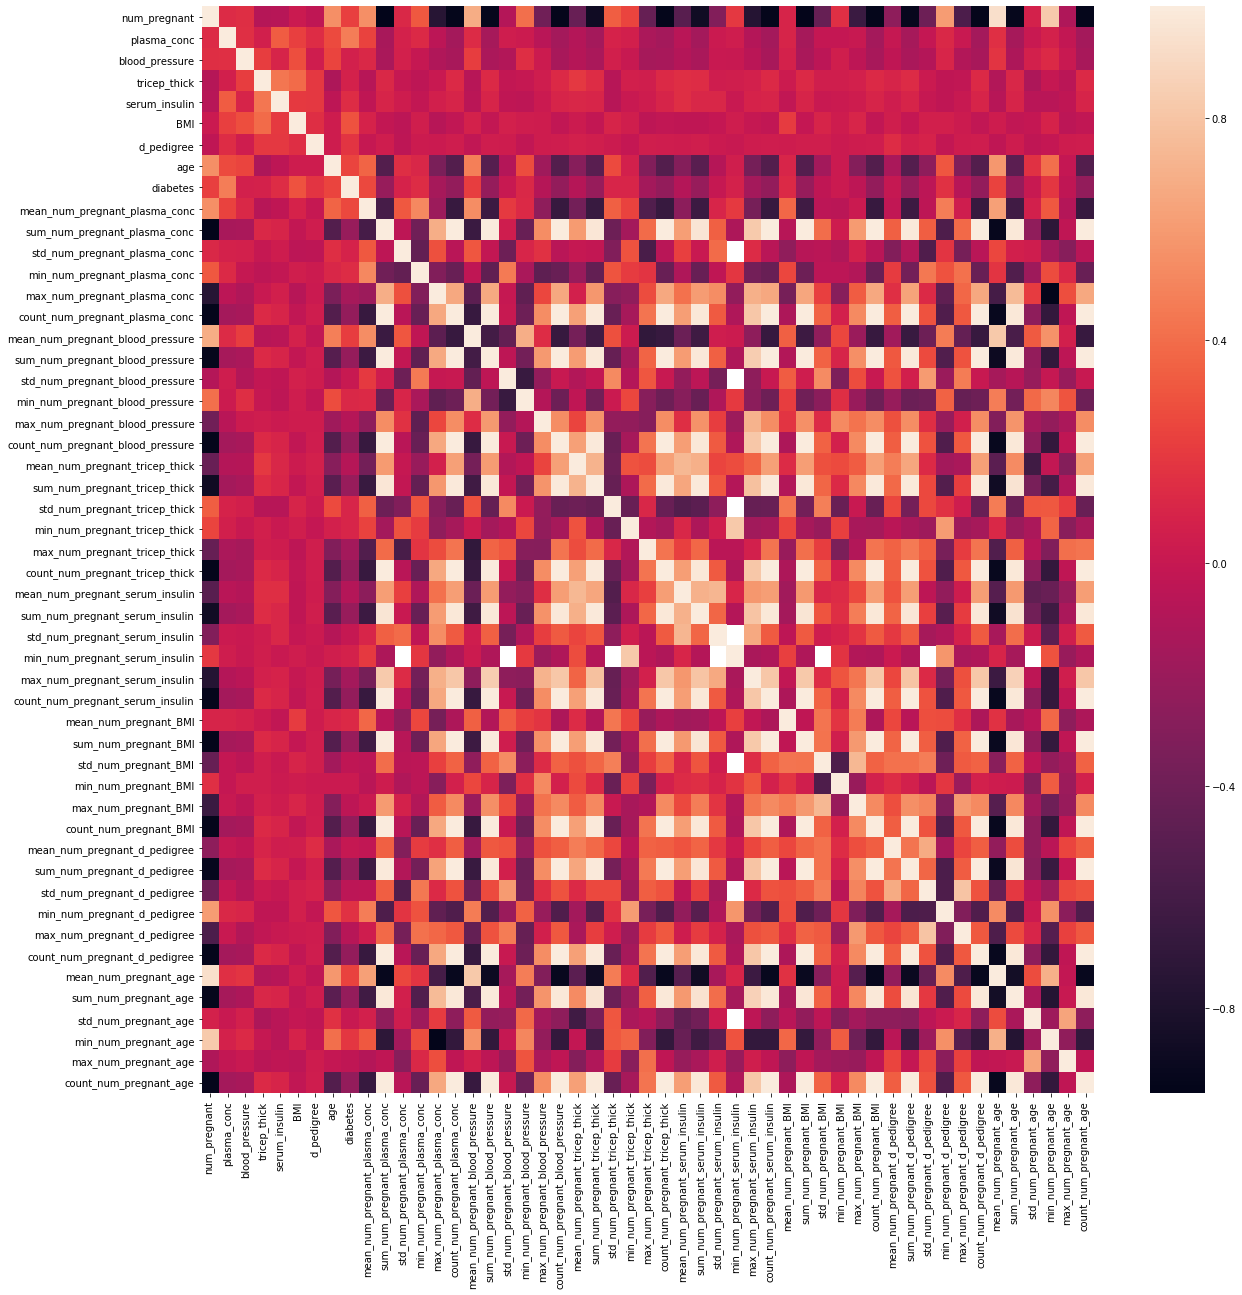

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
sns.heatmap(create_agg(dfdiabetes).corr())

In [95]:
create_agg(dfdiabetes).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 51 columns):
num_pregnant                         768 non-null int64
plasma_conc                          768 non-null int64
blood_pressure                       768 non-null int64
tricep_thick                         768 non-null int64
serum_insulin                        768 non-null int64
BMI                                  768 non-null float64
d_pedigree                           768 non-null float64
age                                  768 non-null int64
diabetes                             768 non-null int64
mean_num_pregnant_plasma_conc        768 non-null float64
sum_num_pregnant_plasma_conc         768 non-null int64
std_num_pregnant_plasma_conc         766 non-null float64
min_num_pregnant_plasma_conc         768 non-null int64
max_num_pregnant_plasma_conc         768 non-null int64
count_num_pregnant_plasma_conc       768 non-null int64
mean_num_pregnant_blood_pressure     768 non-nu

In [ ]:
['mean', 'sum', 'std', 'min', 'max', 'count']

In [88]:
new_dfdiabetes = create_agg(dfdiabetes).fillna(0)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(new_dfdiabetes.drop('diabetes', axis =1), new_dfdiabetes['diabetes'],
                                                    test_size = 0.2, random_state = 101)

In [90]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
print(classification_report(y_train, xgboost.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       392
           1       0.96      0.91      0.93       222

    accuracy                           0.95       614
   macro avg       0.95      0.94      0.95       614
weighted avg       0.95      0.95      0.95       614



In [92]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       108
           1       0.58      0.65      0.61        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.76      0.75      0.76       154



In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
def try_w_pca(df, train_index, test_index):
    scaler = StandardScaler()
    target = df['diabetes']
    df = df.drop('diabetes', axis = 1)
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    for pc in range(2, 11):
        pca = PCA(n_components = pc)
        df_pca =pd.DataFrame(pca.fit_transform(df))
        X_train = df_pca.iloc[train_index]
        X_test = df_pca.iloc[test_index]
        y_train = target.iloc[train_index]
        y_test = target.iloc[test_index]
        xgboost.fit(X_train, y_train)
        print('pc = {} and train'.format(pc))
        print(classification_report(y_train, xgboost.predict(X_train)))
        print('pc = {} and test'.format(pc))
        print(classification_report(y_test, xgboost.predict(X_test)))

In [94]:
try_w_pca(new_dfdiabetes, X_train.index, X_test.index)

pc = 2 and train
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       392
           1       0.79      0.70      0.74       222

    accuracy                           0.83       614
   macro avg       0.82      0.80      0.81       614
weighted avg       0.82      0.83      0.82       614

pc = 2 and test
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       108
           1       0.48      0.54      0.51        46

    accuracy                           0.69       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.70      0.69      0.69       154

pc = 3 and train
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       392
           1       0.84      0.80      0.82       222

    accuracy                           0.87       614
   macro avg       0.86      0.86      0.86       614
weighted avg       0.87 